Must be in tournament 3 or 5 times to have school history rating

In [26]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt; plt.rcdefaults()
#import seaborn as sns

pd.options.display.max_rows = 99999
#pd.options.display.max_columns = 999

In [4]:
#import data

df = pd.read_csv('NCAA Mens March Madness Historical Results.csv')
#df

In [5]:
#select only round of 64, count the team once

#show all winner
dfwR = df.loc[df['Round'] == 'Round of 64']
dfwR = pd.DataFrame(dfwR, columns = ['Winner'])

#show all loser
dflR = df.loc[df['Round'] == 'Round of 64']
dflR = pd.DataFrame(dflR, columns = ['Loser'])

#sort by Winner
dfwS = dfwR.sort_values(by=['Winner'])

#sort by Loser
dflS = dflR.sort_values(by=['Loser'])

#show how many counts
dfwc = dfwS.Winner.value_counts()
dflc = dflS.Loser.value_counts()

#turn into dataFrame(Winner)
ndfW = pd.DataFrame({'Team': [], 'Count': []})
for i, y in dfwc.iteritems():
    ndfW = ndfW.append({'Team': i, 'Count': y}, ignore_index=True)

#turn into dataFrame(Loser)
ndfL = pd.DataFrame({'Team': [], 'Count': []})
for i, y in dflc.iteritems():
    ndfL = ndfL.append({'Team': i, 'Count': y}, ignore_index=True)

#combine two dataFrame
cdf = pd.merge(ndfW, ndfL, on = 'Team', how = 'outer')
cdf = cdf.fillna(0.0)
cdf['Sum'] = cdf['Count_x'] + cdf['Count_y']
cdf = cdf.sort_values(by=['Sum'], ascending=False)
cdf

#Must be in tournament 3 times
cdf3 = cdf[~(cdf['Sum'] < 3)] 

cdf3 = cdf3.reindex(cdf3.index)


In [6]:
cdf3

,Team,Count_x,Count_y,Sum
0,Kansas,29.0,2.0,31.0
2,Duke,27.0,4.0,31.0
6,Arizona,19.0,11.0,30.0
1,North Carolina,28.0,1.0,29.0
3,Kentucky,25.0,2.0,27.0
4,Syracuse,22.0,4.0,26.0
5,Michigan State,19.0,7.0,26.0
10,Texas,17.0,8.0,25.0
16,Indiana,15.0,10.0,25.0
9,Louisville,18.0,6.0,24.0


In [7]:
#create dataFrame
cdf3T = pd.DataFrame(cdf3['Team'])
dfW = pd.DataFrame(df, columns = ['Date', 'Round','Winning Seed','Winner', 'Winning Score', 'Losing Seed','Loser', 'Losing Score'])
dfL = pd.DataFrame(df, columns = ['Date','Round', 'Losing Seed', 'Loser', 'Losing Score','Winning Seed', 'Winner', 'Winning Score'])

#only show the team that is >= 3 in the winner list
win = dfW['Winner'].isin(cdf3T['Team'])
dfW = dfW[win]

#only show the team that is >= 3 in the loser list
lose = dfL['Loser'].isin(cdf3T['Team'])
dfL = dfL[lose]

                                School Rating System

In [8]:
#add another 'Point' column
#point base on round

#add point depend on winner
points1 = []
for idx, row in dfW.iterrows():
    x = row['Round']
    if x == 'Round of 64':
        points1.append(10)
    elif x == 'Round of 32':
        points1.append(20)
    elif x == 'Sweet Sixteen':
        points1.append(30)
    elif x == 'Elite Eight':
        points1.append(40)
    elif x == 'National Semifinals':
        points1.append(50)
    elif x == 'National Championship':
        points1.append(60)
    else:
        points1.append(0)
        
dfW['Point'] = points1

#add point depend on loser
points = []
for idx, row in dfL.iterrows():
    x = row['Round']
    if x == 'Round of 64':
        points.append(10)
    elif x == 'Round of 32':
        points.append(20)
    elif x == 'Sweet Sixteen':
        points.append(30)
    elif x == 'Elite Eight':
        points.append(40)
    elif x == 'National Semifinals':
        points.append(50)
    elif x == 'National Championship':
        points.append(60)
    else:
        points.append(0)
        
dfL['Point'] = points

In [9]:
#create new dataframe df_ap for whole point
#rerange index and add all years
df_ap = pd.DataFrame(columns=['College'])
df_ap['College'] = cdf3['Team']
df_index = pd.DataFrame({'index' :range(1, 206 ,1)})
string = 'Year_'
for i in range(1985, 2016):
    x = string + str(i)
    df_ap[x] = 0

In [10]:
#sum up all the point 

#sum up all the point depend on winner
i = 1
for idx, x in dfW['Winner'].iteritems():
    col = df_ap.columns[i]
    if dfW.Round[idx] == 'National Championship' and i < 31:
        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfW.Point[idx]
        i = i + 1
    else:
        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfW.Point[idx] 
        
#sum up all the point depend on winner        
i = 1
for idx, x in dfL['Loser'].iteritems():
    col = df_ap.columns[i]
    
    if dfL.Round[idx] == 'National Championship' and i < 31:

        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfL.Point[idx]
        i = i + 1
    else:
        #print('else')
        index = df_ap[df_ap['College'] == x].index.values.astype(int)[0]
        df_ap.loc[index, col] += dfL.Point[idx]

In [11]:
df_ap.index = pd.RangeIndex(len(df_ap.index))
df_ap['Point'] = 0.0


for idx, x in df_ap['College'].iteritems():
    y = 0.0
    for column in df_ap:
        if column == 'level_0' or column == 'index' or column == 'College':
            pass
        elif column == 'Point':
            df_ap.loc[idx, column] = y
        else:
            x = df_ap.loc[idx, column]
            y = (x + y) * 0.9

            

School Seeding History

In [12]:
#count all the team win and lose with higher, lower, or even seed.
dff = pd.DataFrame(df_ap, columns = ['College','Point'])
dfW = dfW.rename(index=str, columns={"Losing Seed": "Losing_Seed", "Winning Seed": "Winning_Seed"})
dfL = dfL.rename(index=str, columns={"Losing Seed": "Losing_Seed", "Winning Seed": "Winning_Seed"})
dff['High_Seed_W'] = 0.0
dff['Low_Seed_W'] = 0.0
dff['Even_Seed_W'] = 0.0
dff['High_Seed_L'] = 0.0
dff['Low_Seed_L'] = 0.0
dff['Even_Seed_L'] = 0.0
for idx, x in dfW['Winning_Seed'].iteritems():
    
    if x < dfW.Losing_Seed[idx]:
        index = dff[dff['College'] == dfW.Winner[idx]].index.values.astype(int)[0]
        dff.loc[index, 'High_Seed_W'] += 1    
    elif x > dfW.Losing_Seed[idx]:
        index = dff[dff['College'] == dfW.Winner[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Low_Seed_W'] += 1
    elif x == dfW.Losing_Seed[idx]:
        index = dff[dff['College'] == dfW.Winner[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Even_Seed_W'] += 1

for idx, x in dfL['Losing_Seed'].iteritems():
    
    if x < dfL.Winning_Seed[idx]:
        index = dff[dff['College'] == dfL.Loser[idx]].index.values.astype(int)[0]
        dff.loc[index, 'High_Seed_L'] += 1    
    elif x > dfL.Winning_Seed[idx]:
        index = dff[dff['College'] == dfL.Loser[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Low_Seed_L'] += 1
    elif x == dfL.Winning_Seed[idx]:
        index = dff[dff['College'] == dfL.Loser[idx]].index.values.astype(int)[0]
        dff.loc[index, 'Even_Seed_L'] += 1


In [13]:
#df_ap

In [14]:
#get the sum of high and low seed into sum column
dff['Sum_H'] = dff['High_Seed_W'] + dff['High_Seed_L']
dff['Sum_L'] = dff['Low_Seed_W'] + dff['Low_Seed_L']
dff['Sum_E'] = dff['Even_Seed_W'] + dff['Even_Seed_L']

#get the percentage of high, low, even seed
dff['High_Seed_W'] /=  dff['Sum_H']
dff['Low_Seed_W'] /=  dff['Sum_L']
dff['Even_Seed_W'] /=  dff['Sum_E']

#make the percentage into whole number
dff['High_Seed_W'] *=  100
dff['Low_Seed_W'] *=  100
dff['Even_Seed_W'] *=  100




In [46]:
#explort the dataframe into csv file

df_final2 = pd.DataFrame(dff, columns = ['College','Point', 'High_Seed_W', 'Low_Seed_W', 'Even_Seed_W'])
#df_final2 = df_final2.to_csv (r'/home/shh014/Final_project/hwesw2.csv')
#df_final2

                            Graph

1st graph

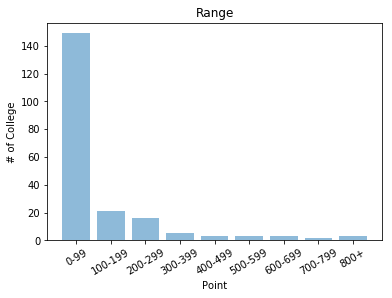

In [16]:
#1

x_pos = [0,0,0,0,0,0,0,0,0]
z = 0
for idx, row in df_final2.iterrows():
    x = row['Point']
    x_pos[int(str(x / 100)[:1])] += 1

        
objects = ('0-99', '100-199', '200-299', '300-399', '400-499','500-599', '600-699', '700-799', '800+')
y_pos = np.arange(len(objects))
plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.xticks(y_pos, objects, fontsize=10, rotation=30)
plt.ylabel('# of College')
plt.xlabel('Point')
plt.title('Range')
plt.show()

2nd graph

In [19]:
#df_final2['Region'] = ''

#for idx, row in df_final2.iterrows():
    #x = row.College
    
    #for idx1, row1 in df.iterrows():
            #y = df.Loser[idx1]
            #z = df.Round[idx1]
            #print('----')
            #print(x)
            #print(y)
            #print(z)
            #if x == y and z == 'Round of 64' :
                #print(True)
            #else:
                #print(False)
    #else:
     #   pass

    #print(x)
    #print('---')
    #print(y)
    #if "Lehigh" == y:
    #    print(True)
    #else:
    #    print(False)



In [20]:
df_ap5 = df_ap.head(5)
df_ap5

,College,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Point
0,Kansas,30,150,60,210,0,30,210,30,150,...,100,210,60,30,100,210,60,30,130,792.389680
1,Duke,30,210,60,150,150,210,210,210,30,...,10,30,60,210,60,10,100,10,270,842.004824
2,Arizona,10,10,10,150,60,30,60,10,10,...,10,10,60,0,100,0,60,100,110,541.023066
3,North Carolina,100,60,100,100,60,60,150,60,210,...,100,150,210,0,100,100,30,30,270,861.682669
4,Kentucky,60,100,10,60,0,0,0,100,150,...,30,10,0,100,150,210,0,210,180,882.300087


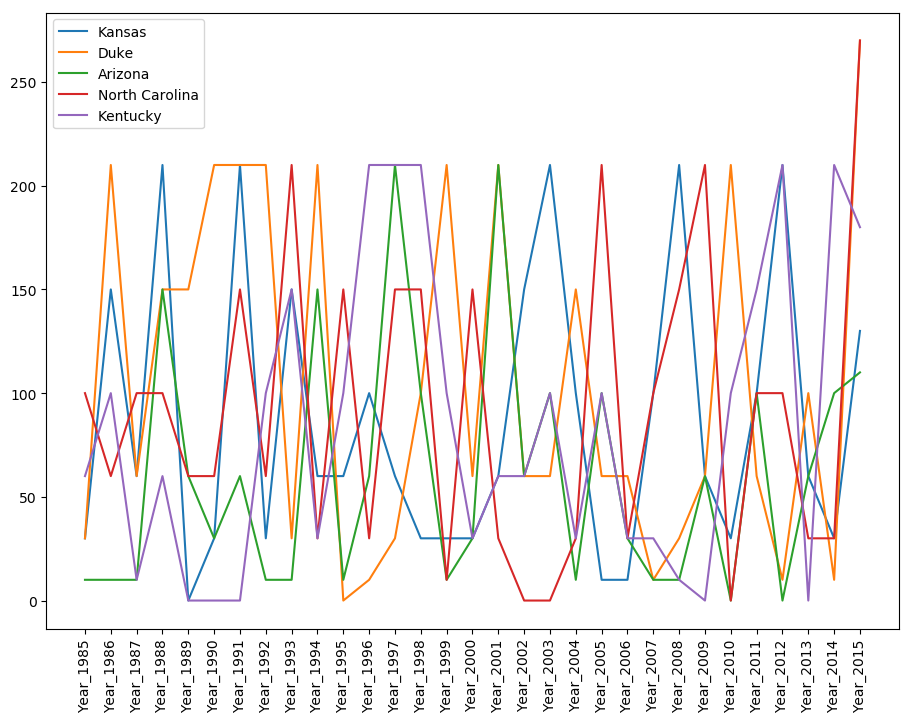

In [45]:
header = list(df_ap5)
header.pop(0)
header.pop(-1)
i = 0
while(i < len(df_ap5)):
    index = list(df_ap5.iloc[i])
    index.pop(0)
    index.pop(-1)
    plt.plot(header, index, label = df_ap5.College[i]) 
    i += 1

plt.xticks(fontsize=10, rotation=90)
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.legend(loc='upper left')
plt.show()
